In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [38]:
df=pd.read_csv('parkinsons.data')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [39]:
features=df.loc[:,df.columns!='status'].values[:,1:]
labels=df.loc[:,'status'].values

In [40]:
print(labels[labels==1].shape[0], labels[labels==0].shape[0])

147 48


In [41]:
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(features)
y=labels

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=7)

In [43]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression()

In [44]:
y_pred_lr=logreg.predict(x_test)

In [45]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_lr)*100)
print("Precision:",metrics.precision_score(y_test, y_pred_lr)*100)
print("Recall:",metrics.recall_score(y_test, y_pred_lr)*100)
print("F1 Score:",metrics.f1_score(y_test, y_pred_lr)*100)

Accuracy: 87.17948717948718
Precision: 90.9090909090909
Recall: 93.75
F1 Score: 92.3076923076923


In [59]:
def roc_curve(reg_type):
    plt.figure(figsize=(12,10))
    probability = reg_type.predict_proba(x_test)[::,1]
    ping, swing, _ = metrics.roc_curve(y_test,  probability)
    auc = metrics.roc_auc_score(y_test, probability)
    plt.plot(ping,swing,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()

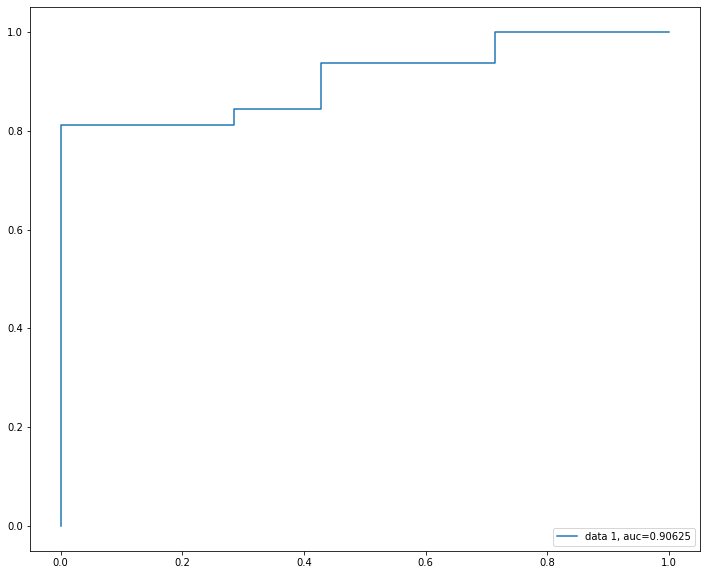

In [60]:
roc_curve(logreg)

In [48]:
model=XGBClassifier()
model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [49]:
y_pred=model.predict(x_test)

In [50]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)
print("Precision:",metrics.precision_score(y_test, y_pred)*100)
print("Recall:",metrics.recall_score(y_test, y_pred)*100)
print("F1 Score:",metrics.f1_score(y_test, y_pred)*100)

Accuracy: 94.87179487179486
Precision: 96.875
Recall: 96.875
F1 Score: 96.875


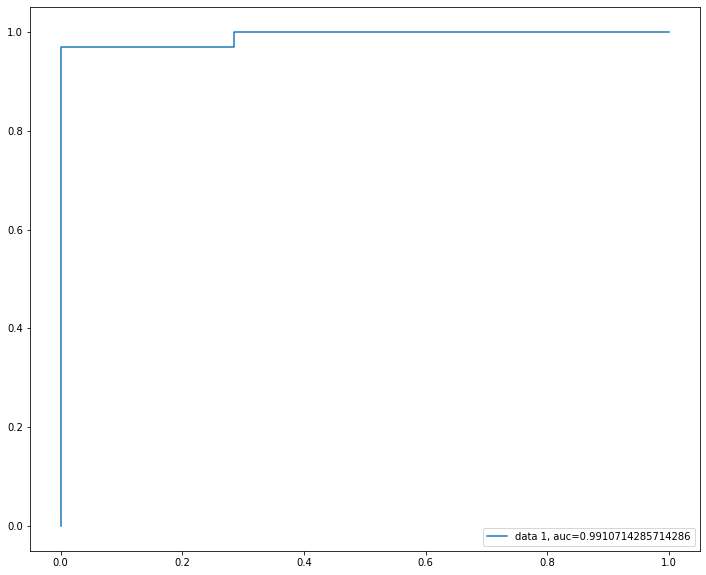

In [61]:
roc_curve(model)